In [1]:
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
import matplotlib.pyplot as plt
batch_xn, batch_yn = mnist.train.next_batch(1)

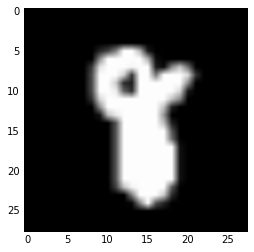

In [4]:
X = batch_xn.reshape([28, 28])
plt.gray()
plt.imshow(X)
plt.show()

In [18]:
import tensorflow as tf
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(- tf.reduce_sum(y_*tf.log(y), reduction_indices = [1]))

In [20]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
for _ in range(1000):
    batch_xn, batch_yn = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict = {x: batch_xn, y_: batch_yn})

In [21]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict = {x: mnist.test.images, y_: mnist.test.labels}))

0.9185
